<a href="https://colab.research.google.com/github/meryemtetik/DL_Assignments/blob/master/DL_Assignment_2_(Image_Classification_with_CNN)_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")   

There are  60000 images in the training dataset
There are  10000 images in the test dataset


**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [4]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [5]:
X_train[5].shape

(28, 28)

In [6]:
X_train[5]

array([[  0,   0,   0,   0,   1,   0,   0,   0,   0,  22,  88, 188, 172,
        132, 125, 141, 199, 143,   9,   0,   0,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,  20, 131, 199, 206, 196, 202, 242,
        255, 255, 250, 222, 197, 206, 188, 126,  17,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,  35, 214, 191, 183, 178, 175, 168, 150,
        162, 159, 152, 158, 179, 183, 189, 195, 185,  82,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 170, 190, 172, 177, 176, 171, 169, 162,
        155, 148, 154, 169, 174, 175, 175, 177, 183, 188,  12,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  25, 194, 180, 178, 174, 184, 187, 189, 187,
        184, 181, 189, 200, 197, 193, 190, 178, 175, 194,  90,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  42, 218, 191, 197, 208, 204, 211, 209, 210,
        212, 211, 214, 215, 213, 214, 211, 211, 191, 200, 158,   0,   0,
          0,   0],
       [  

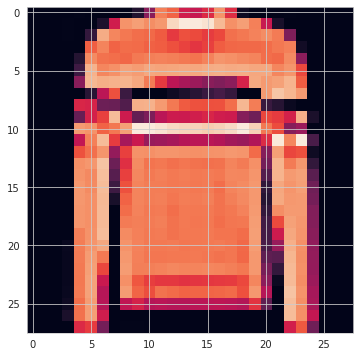

In [7]:
plt.imshow(X_train[5])

In [8]:
y_train.shape

(60000,)

In [9]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
y_train[5]

2

In [11]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

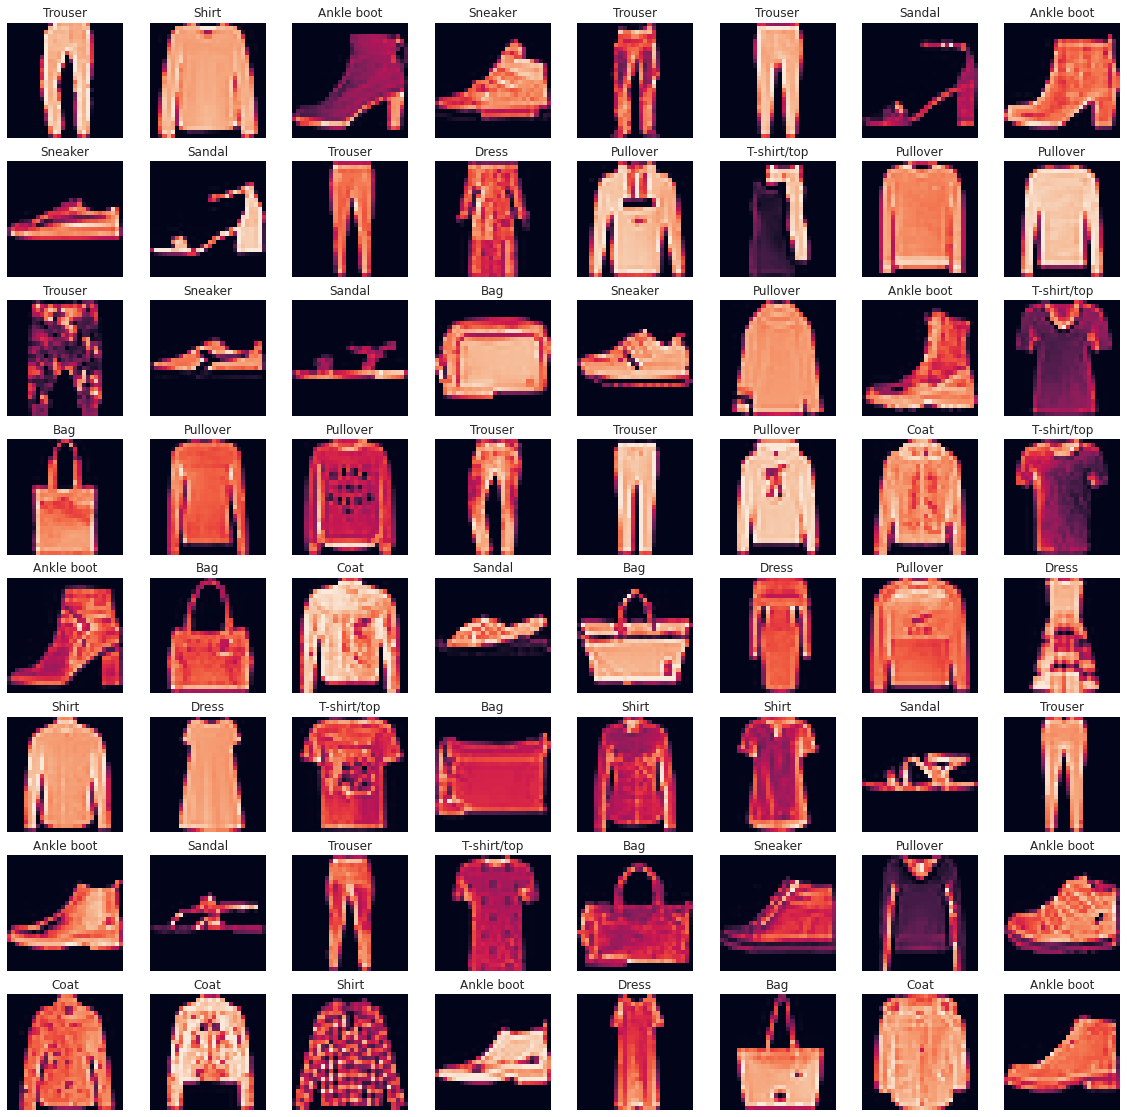

In [12]:
plt.figure(figsize=(20, 20))
for i in range(64):
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    plt.subplot(8, 8, i+1)
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(X_train[rand_index])

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [13]:
X_train[5].min()

0

In [14]:
X_train[5].max()

255

In [15]:
# Normalize image pixels

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [16]:
X_train[5].min()

0.0

In [17]:
X_train[5].max()

1.0

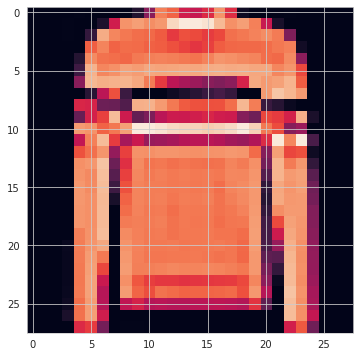

In [18]:
plt.imshow(X_train[5])

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [19]:
X_train.shape

(60000, 28, 28)

In [20]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [21]:
X_train.reshape(60000, 28, 28, 1).shape

(60000, 28, 28, 1)

In [22]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [23]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [24]:
from tensorflow.keras.utils import to_categorical

In [25]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_test.shape

(10000, 10)

In [26]:
y_train[9]

5

In [27]:
Y_train[9]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [38]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu', strides=(1,1), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=28, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 28)        280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 28)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 28)        7084      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 28)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1372)              0         
                                                                 
 dense_3 (Dense)             (None, 128)              

In [31]:
((3* 3 * 1) + 1) * 28

280

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

In [36]:
early_stop = EarlyStopping(monitor='val_loss',mode="min", patience=2, restore_best_weights = True)

In [40]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 17s 4ms/step - loss: 0.4370 - accuracy: 0.8396 - val_loss: 0.3193 - val_accuracy: 0.8881
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2806 - accuracy: 0.8980 - val_loss: 0.2752 - val_accuracy: 0.8996
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2414 - accuracy: 0.9136 - val_loss: 0.2687 - val_accuracy: 0.9036
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2209 - accuracy: 0.9203 - val_loss: 0.2643 - val_accuracy: 0.9061
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2080 - accuracy: 0.9247 - val_loss: 0.2715 - val_accuracy: 0.9080
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2005 - accuracy: 0.9284 - val_loss: 0.2751 - val_accuracy: 0.9087


**TASK 7: Plot values of metrics you used in your model.**

In [41]:
model.metrics_names

['loss', 'accuracy']

In [42]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.437,0.840,0.319,0.888
1,0.281,0.898,0.275,0.900
2,0.241,0.914,0.269,0.904
3,0.221,0.920,0.264,0.906
4,0.208,0.925,0.271,0.908


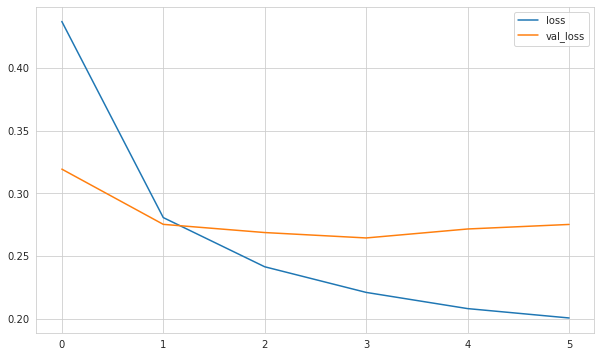

In [43]:
summary[["loss", "val_loss"]].plot();

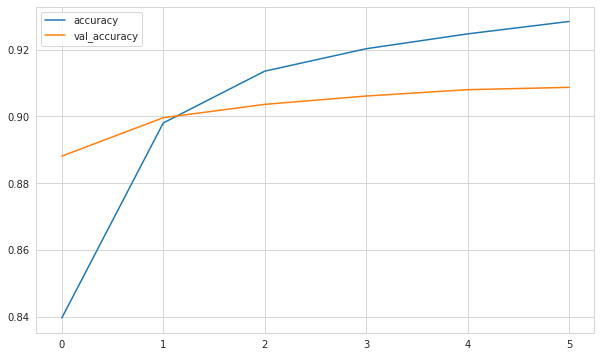

In [44]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [45]:
from sklearn.metrics import classification_report, confusion_matrix

In [47]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2643 - accuracy: 0.9061


[0.2643471956253052, 0.9060999751091003]

In [48]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2643471956253052
Test accuracy: 0.9060999751091003


In [49]:
pred_prob = model.predict(X_test)
pred_prob

array([[5.3739853e-07, 5.4230167e-08, 1.9300378e-06, ..., 6.1387953e-05,
        1.7037001e-07, 9.9987936e-01],
       [9.6739643e-07, 6.0457742e-13, 9.9981898e-01, ..., 5.9814223e-11,
        9.5864072e-10, 2.0894675e-09],
       [6.8582107e-05, 9.9991953e-01, 2.2756813e-06, ..., 1.5363402e-11,
        8.3312187e-08, 1.8961693e-10],
       ...,
       [5.6186127e-09, 1.0382618e-15, 3.4041497e-10, ..., 6.4628741e-10,
        9.9999988e-01, 8.9864627e-10],
       [6.4501342e-07, 9.9999166e-01, 1.7102732e-07, ..., 2.7598441e-11,
        4.5751518e-09, 2.1802745e-11],
       [9.0247096e-04, 2.3240884e-05, 8.7877049e-04, ..., 4.5573387e-02,
        6.4028716e-03, 5.6146295e-03]], dtype=float32)

In [50]:
pred_prob.shape

(10000, 10)

In [51]:
y_pred = np.argmax(pred_prob, axis=1)

In [52]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85      1000
           1       1.00      0.97      0.99      1000
           2       0.91      0.78      0.84      1000
           3       0.90      0.92      0.91      1000
           4       0.81      0.89      0.85      1000
           5       0.97      0.98      0.98      1000
           6       0.71      0.78      0.74      1000
           7       0.96      0.96      0.96      1000
           8       0.97      0.99      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [54]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [55]:
print(confusion_matrix(y_test, y_pred))

[[818   0   8  22   6   1 139   0   6   0]
 [  1 973   1  15   4   0   4   0   2   0]
 [  8   0 781   9 107   0  92   0   3   0]
 [ 15   0   6 922  30   0  24   0   3   0]
 [  0   0  23  23 891   0  58   0   5   0]
 [  0   0   0   0   0 984   0  10   0   6]
 [ 76   0  39  36  58   0 781   0  10   0]
 [  0   0   0   0   0  20   0 962   1  17]
 [  1   0   1   1   2   2   2   3 988   0]
 [  0   0   1   0   0   9   0  29   0 961]]


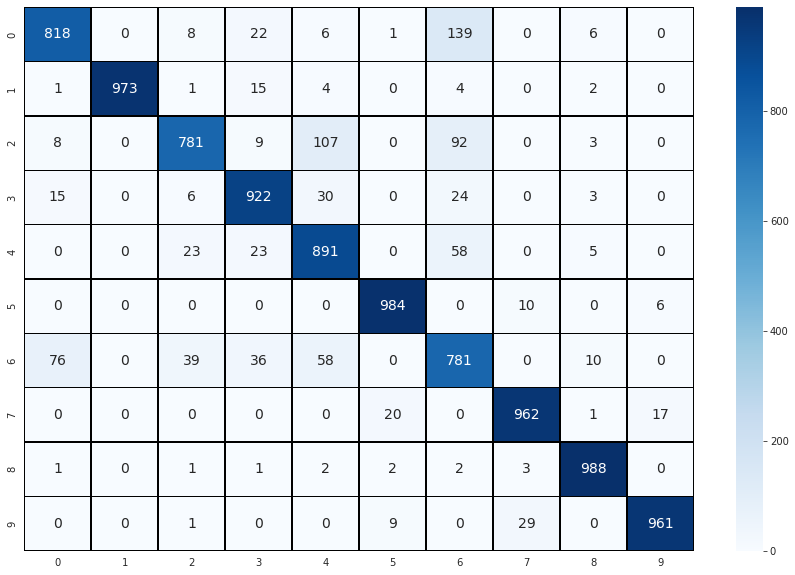

In [56]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 14})

## Prediction

In [63]:
my_image = X_test[5]

In [64]:
my_image.shape

(28, 28, 1)

In [68]:
my_image = my_image.reshape(28,28)

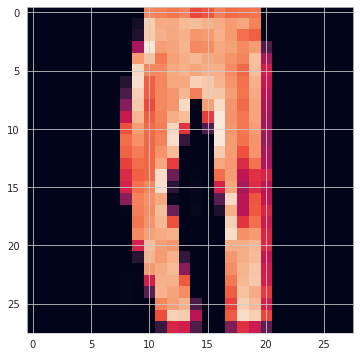

In [69]:
plt.imshow(my_image)

In [72]:
image_prediction = model.predict(my_image.reshape(1,28,28,1))

In [73]:
image_prediction

array([[7.7882098e-05, 9.9990594e-01, 6.1577121e-06, 2.9611540e-06,
        2.2495819e-06, 1.5145210e-08, 4.4400290e-06, 2.2127584e-12,
        3.4801843e-07, 2.3489125e-10]], dtype=float32)

In [74]:
np.argmax(image_prediction, axis=1)

array([1])

In [75]:
result=np.argmax(image_prediction, axis=1)

In [76]:
result

array([1])

In [77]:
classes[int(result)]

'Trouser'

In [78]:
model.save("cnn-assignment-2.h5")

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___